<a href="https://colab.research.google.com/github/aku019/Analytics-ML-DL-Learning/blob/main/digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!pip uninstall scipy

! pip install scipy==1.1.0


Uninstalling scipy-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/scipy-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 31.2MB 93kB/s 
ERROR: tensorflow 2.2.0rc3 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
from scipy.misc import imread


In [ ]:


import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Found GPU at: /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10088139010979133943, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17613122812711727821
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11232014079234608068
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13973295210924431031
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
!unzip "/gdrive/My Drive/neural net/rd_train2.zip"

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   
 extracting: Images/train/5521.png   

In [ ]:
#!pip install scipy==0.18.1
#!pip install Pillow==4.0.0
import os 
import numpy as np 
import pandas as pd 
#from scipy.misc.pilutil import imread
#from matplotlib.pyplot import imread

from sklearn.metrics import accuracy_score 
import tensorflow as tf 
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
seed = 128 
rng = np.random.RandomState(seed)
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

Using TensorFlow backend.


False

In [ ]:
'''
LOAN DATASET
'''

# required libraries
import pandas as pd
import numpy as np
from sklearn import tree
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15, 6
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


# read the dataset

train = pd.read_csv("/gdrive/My Drive/neural net/train.csv")
test = pd.read_csv("/gdrive/My Drive/neural net/rd_test.csv") 
sample_submission = pd.read_csv("/gdrive/My Drive/neural net/rd_ss.csv") 
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


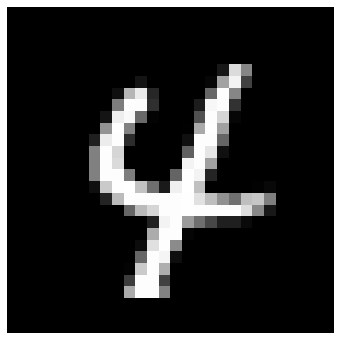

In [ ]:
import pylab
img_name = rng.choice(test.filename) 
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name) 
img = imread("Images/test/49302.png",flatten=True) 
pylab.imshow(img, cmap='gray') 
pylab.axis('off') 
pylab.show()

In [ ]:
temp = []
for img_name in train.filename:

  print("start "+img_name)

   
  img = imread("Images/train/"+img_name,flatten=True)
  img = img.astype('float32')
  print(np.shape(img))
  print(img.shape)
  temp.append(img)
  
  
  print("end "+img_name)
train_x = np.stack(temp) 
  

   
     

     
     


In [ ]:
train_x.shape

(49000, 28, 28)

In [ ]:
train_x /= 255.0 

In [ ]:
train_x.shape

(49000, 28, 28)

In [ ]:
train_x = train_x.reshape(-1, 784).astype('float32')    

In [ ]:
train_x.shape

(49000, 784)

In [ ]:

temp = [] 

for img_name in test.filename:
  print("start "+img_name)
  img = imread("Images/test/"+img_name,flatten=True)
  
  img = img.astype('float32')
  print(img.shape)
  temp.append(img) 
  
  print("end "+img_name)

test_x = np.stack(temp) 


In [ ]:
test_x.shape

(21000, 28, 28)

In [ ]:
test_x /= 255.0 
test_x = test_x.reshape(-1, 784).astype('float32') 


In [ ]:
test_x.shape

(21000, 784)

In [ ]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [ ]:
train_y.shape

(49000, 10)

In [ ]:
split_size = int(train_x.shape[0]*0.9) 
train_x, val_x = train_x[:split_size], train_x[split_size:] 
train_y, val_y = train_y[:split_size], train_y[split_size:]
train.label.iloc[split_size:]

44100    8
44101    2
44102    0
44103    6
44104    1
        ..
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, Length: 4900, dtype: int64

In [ ]:

val_x.shape

(4900, 784)

In [ ]:
train_x.shape

(44100, 784)

In [ ]:
val_y.shape

(4900, 10)

In [ ]:
train_y.shape

(44100, 10)

In [ ]:
input_num_units = 784
hidden_num_units = 50 
output_num_units = 10
 
epochs = 5 
batch_size = 128
 
# import keras modules 
from keras.models import Sequential 
from keras.layers import Dense 

# create model 
model = Sequential([  Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'), ]) 

# compile the model with necessary attributes 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
  del sys.path[0]


In [ ]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 44100 samples, validate on 4900 samples
Epoch 1/5
44100/44100 [==============================] - 3s 68us/step - loss: 0.5123 - accuracy: 0.8651 - val_loss: 0.2877 - val_accuracy: 0.9214
Epoch 2/5
44100/44100 [==============================] - 1s 32us/step - loss: 0.2461 - accuracy: 0.9305 - val_loss: 0.2272 - val_accuracy: 0.9353
Epoch 3/5
44100/44100 [==============================] - 1s 32us/step - loss: 0.1952 - accuracy: 0.9457 - val_loss: 0.1909 - val_accuracy: 0.9459
Epoch 4/5
44100/44100 [==============================] - 1s 32us/step - loss: 0.1639 - accuracy: 0.9548 - val_loss: 0.1735 - val_accuracy: 0.9471
Epoch 5/5
44100/44100 [==============================] - 1s 32us/step - loss: 0.1414 - accuracy: 0.9608 - val_loss: 0.1552 - val_accuracy: 0.9553


In [ ]:
input_num_units =784
hidden_num_units = 500 
output_num_units = 10 
epochs = 5 
batch_size = 128 
model = Sequential([ Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'), ])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
trained_model_500 = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=500)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="softmax", units=10)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 44100 samples, validate on 4900 samples
Epoch 1/5
44100/44100 [==============================] - 2s 39us/step - loss: 0.3078 - accuracy: 0.9135 - val_loss: 0.1737 - val_accuracy: 0.9486
Epoch 2/5
44100/44100 [==============================] - 2s 39us/step - loss: 0.1279 - accuracy: 0.9634 - val_loss: 0.1144 - val_accuracy: 0.9661
Epoch 3/5
44100/44100 [==============================] - 2s 41us/step - loss: 0.0826 - accuracy: 0.9763 - val_loss: 0.1091 - val_accuracy: 0.9684
Epoch 4/5
44100/44100 [==============================] - 2s 41us/step - loss: 0.0586 - accuracy: 0.9834 - val_loss: 0.0941 - val_accuracy: 0.9692
Epoch 5/5
44100/44100 [==============================] - 2s 38us/step - loss: 0.0432 - accuracy: 0.9877 - val_loss: 0.0879 - val_accuracy: 0.9716


In [ ]:
input_num_units = 784
hidden1_num_units = 500 
hidden2_num_units = 500 
hidden3_num_units = 500 
hidden4_num_units = 500 
hidden5_num_units = 500 
output_num_units = 10 
epochs = 15
batch_size = 128 

model = Sequential([ Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'), Dropout(0.2), Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'), Dropout(0.2), Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'), Dropout(0.2), Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'), Dropout(0.2), Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'), Dropout(0.2), 
Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'), ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=500)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="softmax", units=10)`
  if sys.path[0] == '':


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
trained_model_deep_n_wide = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 44100 samples, validate on 4900 samples
Epoch 1/15
44100/44100 [==============================] - 4s 89us/step - loss: 0.3406 - accuracy: 0.8946 - val_loss: 0.1376 - val_accuracy: 0.9573
Epoch 2/15
44100/44100 [==============================] - 4s 80us/step - loss: 0.1462 - accuracy: 0.9577 - val_loss: 0.1207 - val_accuracy: 0.9657
Epoch 3/15
44100/44100 [==============================] - 3s 79us/step - loss: 0.1072 - accuracy: 0.9687 - val_loss: 0.1050 - val_accuracy: 0.9694
Epoch 4/15
44100/44100 [==============================] - 4s 81us/step - loss: 0.0925 - accuracy: 0.9731 - val_loss: 0.0918 - val_accuracy: 0.9716
Epoch 5/15
44100/44100 [==============================] - 4s 80us/step - loss: 0.0722 - accuracy: 0.9785 - val_loss: 0.0903 - val_accuracy: 0.9749
Epoch 6/15
44100/44100 [==============================] - 4s 80us/step - loss: 0.0631 - accuracy: 0.9816 - val_loss: 0.0914 - val_accuracy: 0.9751
Epoch 7/15
44100/44100 [==============================] - 4s 79us/ste

In [ ]:
train_x_temp = train_x.reshape(-1, 28, 28, 1) 
val_x_temp = val_x.reshape(-1, 28, 28, 1) 

# define vars input_shape = (784,) 
input_reshape = (28, 28, 1) 
conv_num_filters = 5 
conv_filter_size = 5 
pool_size = (2, 2) 
hidden_num_units = 50 
output_num_units = 10 
epochs =35
batch_size = 128

model = Sequential([ InputLayer(input_shape=input_reshape),  Convolution2D(25, 5, 5, activation='relu'), MaxPooling2D(pool_size=pool_size),  Convolution2D(25, 5, 5, activation='relu'), MaxPooling2D(pool_size=pool_size),  Convolution2D(25, 4, 4, activation='relu'),  Flatten(),  Dense(output_dim=hidden_num_units, activation='relu'),  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'), ]) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
trained_model_conv = model.fit(train_x_temp, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x_temp, val_y))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (4, 4), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 44100 samples, validate on 4900 samples
Epoch 1/35
44100/44100 [==============================] - 4s 94us/step - loss: 0.3606 - accuracy: 0.8854 - val_loss: 0.1192 - val_accuracy: 0.9631
Epoch 2/35
44100/44100 [==============================] - 4s 88us/step - loss: 0.0945 - accuracy: 0.9700 - val_loss: 0.0844 - val_accuracy: 0.9729
Epoch 3/35
44100/44100 [==============================] - 4s 91us/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0508 - val_accuracy: 0.9863
Epoch 4/35
44100/44100 [==============================] - 4s 91us/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0498 - val_accuracy: 0.9837
Epoch 5/35
44100/44100 [==============================] - 4s 91us/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.0369 - val_accuracy: 0.9888
Epoch 6/35
44100/44100 [==============================] - 4s 91us/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0446 - val_accuracy: 0.9869
Epoch 7/35
44100/44100 [==============================] - 4s 92us/ste

In [ ]:
test_x_1=test_x.reshape(-1, 28, 28, 1) 

Prediction is:  0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


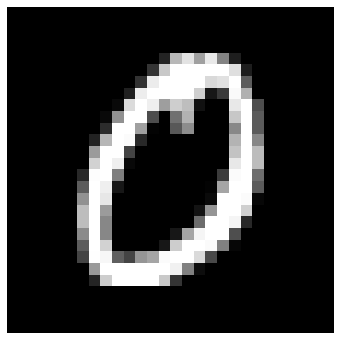

In [ ]:
pred = model.predict_classes(test_x_1) 
img_name = rng.choice(test.filename) 
img = imread("Images/test/"+img_name)
test_index = int(img_name.split('.')[0]) - train.shape[0] 
print ("Prediction is: ", pred[test_index] )
pylab.imshow(img, cmap='gray') 
pylab.axis('off') 
pylab.show() 

In [ ]:
sample_submission.filename = test.filename; 
sample_submission.label = pred
sample_submission.to_csv( 'sub07.csv', index=False)
from google.colab import files
files.download('sub07.csv')
